In [2]:
import pandas
pandas.__version__

'1.2.4'

1.Random Book
2.Books Above a certain rating
3.Search for books within a certain range
4.Author Search
5.Top 5 author


enter to search  5


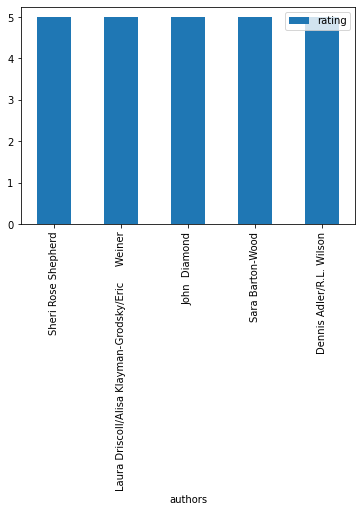

In [20]:
# Importing libraries
import pandas as pd
from fuzzywuzzy import process, fuzz
def recommendation():
    
    # Read csv file into a pandas dataframe
    df = pd.read_csv("books.csv")
    df = df[df.language_code =='eng']
    df['Title'] = df['title'].str.split('(').str[0]
    print("1.Random Book\n2.Books Above a certain rating\n3.Search for books within a certain range\n4.Author Search\n5.Top 5 author")
    search= input("enter to search ")
    if search=="1":
        df_new= df.sample(replace=True)[['Title', 'authors',"rating"]]
        print("Title: ", df_new[['Title']].to_string(index=False, header=False))
        print("Author: ", df_new[['authors']].to_string(index=False, header=False))
        print("Rating: ", df_new[['rating']].to_string(index=False, header=False))
        return "Enjoy!" 
    elif search=="2":
            print("Enter rating between 1 and 5: ")
            rate= float(input("enter rating "))
            if rate < 0 or rate > 5:
                print("Error: Enter rating between 0 and 5")
                return "Please Correct"
            else:
                df_rate = df[df['rating'].astype(float) >= rate]
                df_new= df_rate.sample(replace=True)[['Title', 'authors',"rating"]]
                print("Title: ", df_new[['Title']].to_string(index=False, header=False))
                print("Author: ", df_new[['authors']].to_string(index=False, header=False))
                print("Rating: ", df_new[['rating']].to_string(index=False, header=False))
                return "Enjoy!"
    elif search=="3":
            print("Enter rating range between 1 and 5: ")
            llimit= float(input("enter lower limit "))
            if llimit<1 or llimit>5:
                llimit=1
                ulimit= float(input("enter upper limit"))
            if ulimit>5 or ulimit<llimit:
                ulimit=5
            df_rate = df[(df['rating'].astype(float) >= llimit) & (df['rating'].astype(float) <= ulimit) ]
            df_new= df_rate.sample(replace=True)[['title', 'authors',"rating"]]
            print("Title: ", df_new[['title']].to_string(index=False, header=False))
            print("Author: ", df_new[['authors']].to_string(index=False, header=False))
            print("Rating: ", df_new[['rating']].to_string(index=False, header=False))
            return "Enjoy!"
    elif search=="4":
            print("Enter author name:")
            search1=input()
            #Retrieve Author Name
            search1 = search1.split()
            author = search1[1:]
            author = " ".join(author)
            print(f"Entered Author: {author}")

            #Make Nested list with authors and subauthors to pass in fuzzywuzzy
            unique_authors = df['authors'].unique().tolist()
            for i in range(len(unique_authors)):
                subauthors = unique_authors[i].split('/')
                unique_authors[i] = subauthors
            #print(len(unique_authors))

            #Find Exact author names that fuzzily match user input 
            finds=[]
            for i in unique_authors:
                l = process.extract(author, i, scorer=fuzz.token_sort_ratio)
                for j in l:
                    if j[1] > 70 : #change value for stricter or more general results
                        finds.append(i)          
            finds = ["/".join(l) for l in finds]            
            print(f"Authors found: {finds}")

            authors = tuple(df['authors'])
            for ix in range(len(authors)):
                if authors[ix] in finds:
                    df_new = df.iloc[[ix]]
                    print()
                    print("Title: ", df_new[['Title']].to_string(index=False, header=False))
                    print("Author: ", df_new[['authors']].to_string(index=False, header=False))
                    print("Rating: ", df_new[['rating']].to_string(index=False, header=False))
    elif search=="5":

            df = clean_data()
            plot_top5_highest_avg(df)

def clean_data():
                df = pd.read_csv("books.csv", index_col="bookID")
                df.drop([12224, 16914, 22128, 34889], inplace = True, axis=0)
                df['rating'] = df['rating'].astype('float64')
                df.rename(columns={'  num_pages': 'num_pages'}, inplace=True)
                df['num_pages'] = df['num_pages'].astype('int')
                df = df.dropna(axis=1,how='all')
                return df
def plot_top5_highest_avg(df:pd.DataFrame):
                author_count_num = df.groupby(['authors'], as_index=False).agg({'rating':'mean'})
                df_new = author_count_num.sort_values(by=['rating'], ascending=False)
                df_new.head(5).plot(x='authors', y='rating',kind='bar')
                
recommendation()